# Describing data

In [1]:
import random
from typing import List

In [2]:
num_friends = [random.choice(range(101)) 
               for _ in range(1000)]

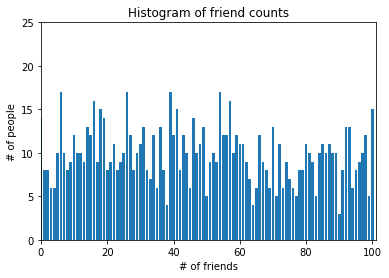

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title("Histogram of friend counts")
plt.xlabel("# of friends")
plt.ylabel('# of people')
plt.show()

In [4]:
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)

# Central Tendency

Usually we'll want some notion of where data is centred. Usually by this we mean the mean or average.

In [5]:
def mean(xs: List[float]) -> float:
    return sum(xs)/len(xs)

mean(num_friends)

48.286

Then there's the median:

In [6]:
def _median_odd(xs: List[float]) -> float:
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + 
            sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [7]:
assert median([1,10,2,9,5]) == 5
assert median([1,9,2,10]) == (2+9)/2

A generalisation of the median is the *quantile*. 

Quantiles are the values under which a certain percentile of the data lies, with the median being 50%.

In [8]:
def quantile(xs: List[float], p: float) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

print(quantile(num_friends,0.1))
print(quantile(num_friends,0.75))

10
72


You also may want to look at the mode, or the most common value:

In [9]:
def mode(x: List[float]) -> List[float]:
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() 
            if count == max_count]

set(mode(num_friends))

{6, 26, 39, 54}

# Dispersion

A measure of how spread out data is.

Typically near-zero dispersion measures mean not very spread out, with higher values meaning very spread out.

A very simple measure of dispersion is the range:

In [10]:
from typing import List
import random

def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

test_range = [random.choice(range(100)) for _ in range(100)]

print(data_range(test_range))

99


A more complex measure of dispersion is the variance of a data set: